In [124]:
#libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd



In [125]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import joblib

from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import f1_score,auc,roc_auc_score,classification_report,confusion_matrix



from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler




In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission_iA3afxn.csv')

# EDA : Exploratory Data Analysis

In [128]:
train.shape,test.shape,sub.shape

((381109, 12), (127037, 11), (127037, 2))

In [129]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [130]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [131]:
sub.head(2)

,id,Response
0,381110,0
1,381111,0


In [132]:
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

# Train datasetset is imbalanced based on the target variable Response

[Text(0, 0, '334399'), Text(0, 0, '46710')]

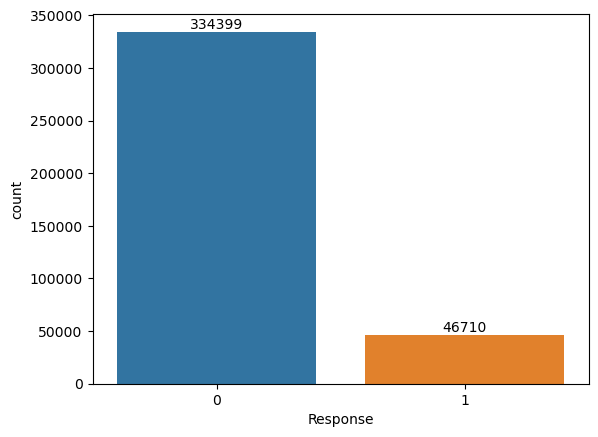

In [133]:
ax = sns.countplot(x='Response', data=train)
ax.bar_label(ax.containers[0])

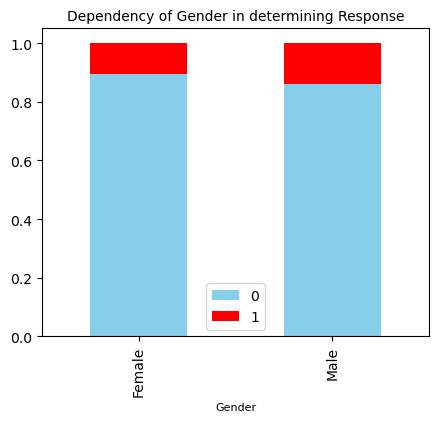

In [134]:
data = pd.crosstab(train['Gender'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 4), color = ['skyblue', 'red'])

plt.title('Dependency of Gender in determining Response', fontsize = 10)
plt.xlabel('Gender', fontsize = 8)
plt.legend()
plt.show()

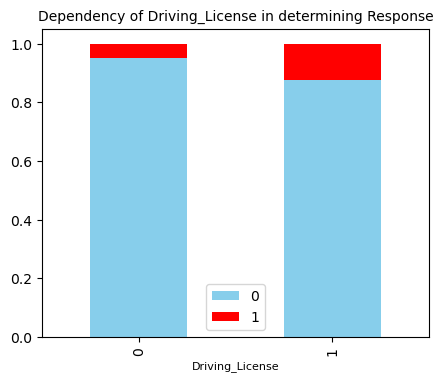

In [135]:
data = pd.crosstab(train['Driving_License'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 4), color = ['skyblue', 'red'])

plt.title('Dependency of Driving_License in determining Response', fontsize = 10)
plt.xlabel('Driving_License', fontsize = 8)
plt.legend()
plt.show()

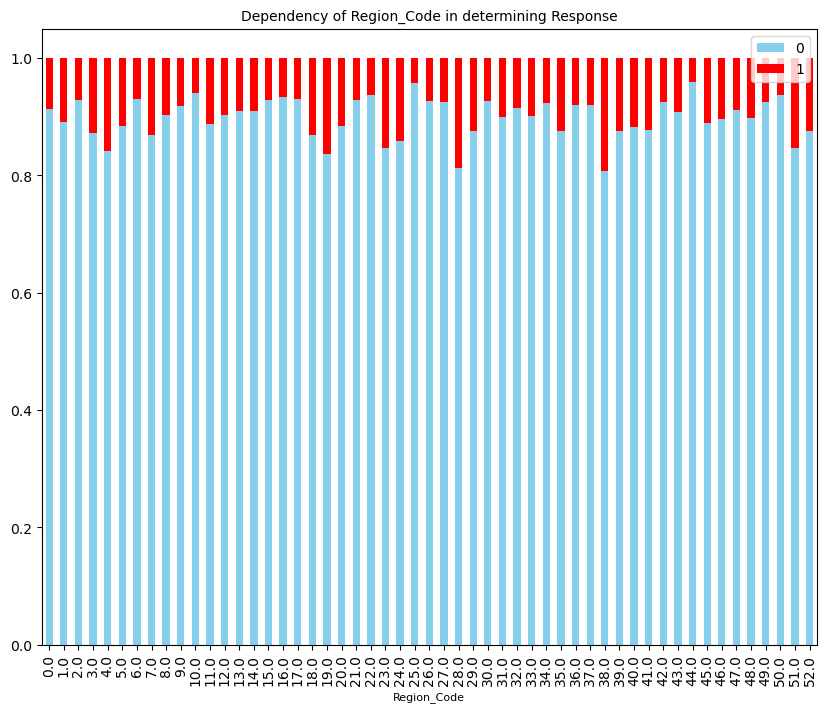

In [136]:
data = pd.crosstab(train['Region_Code'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['skyblue', 'red'])

plt.title('Dependency of Region_Code in determining Response', fontsize = 10)
plt.xlabel('Region_Code', fontsize = 8)
plt.legend()
plt.show()

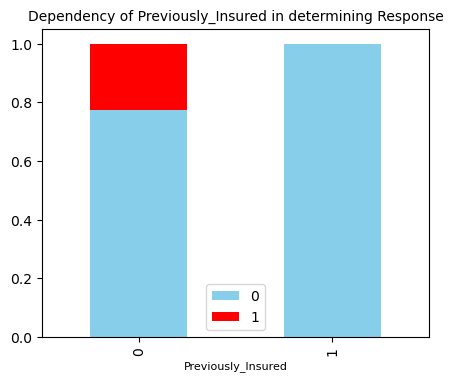

In [137]:
data = pd.crosstab(train['Previously_Insured'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 4), color = ['skyblue', 'red'])

plt.title('Dependency of Previously_Insured in determining Response', fontsize = 10)
plt.xlabel('Previously_Insured', fontsize = 8)
plt.legend()
plt.show()

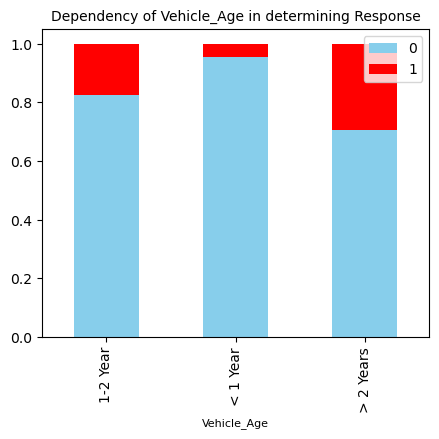

In [138]:
data = pd.crosstab(train['Vehicle_Age'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 4), color = ['skyblue', 'red'])

plt.title('Dependency of Vehicle_Age in determining Response', fontsize = 10)
plt.xlabel('Vehicle_Age', fontsize = 8)
plt.legend()
plt.show()

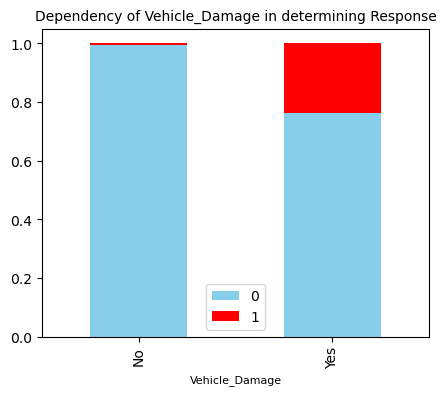

In [139]:
data = pd.crosstab(train['Vehicle_Damage'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (5, 4), color = ['skyblue', 'red'])

plt.title('Dependency of Vehicle_Damage in determining Response', fontsize = 10)
plt.xlabel('Vehicle_Damage', fontsize = 8)
plt.legend()
plt.show()

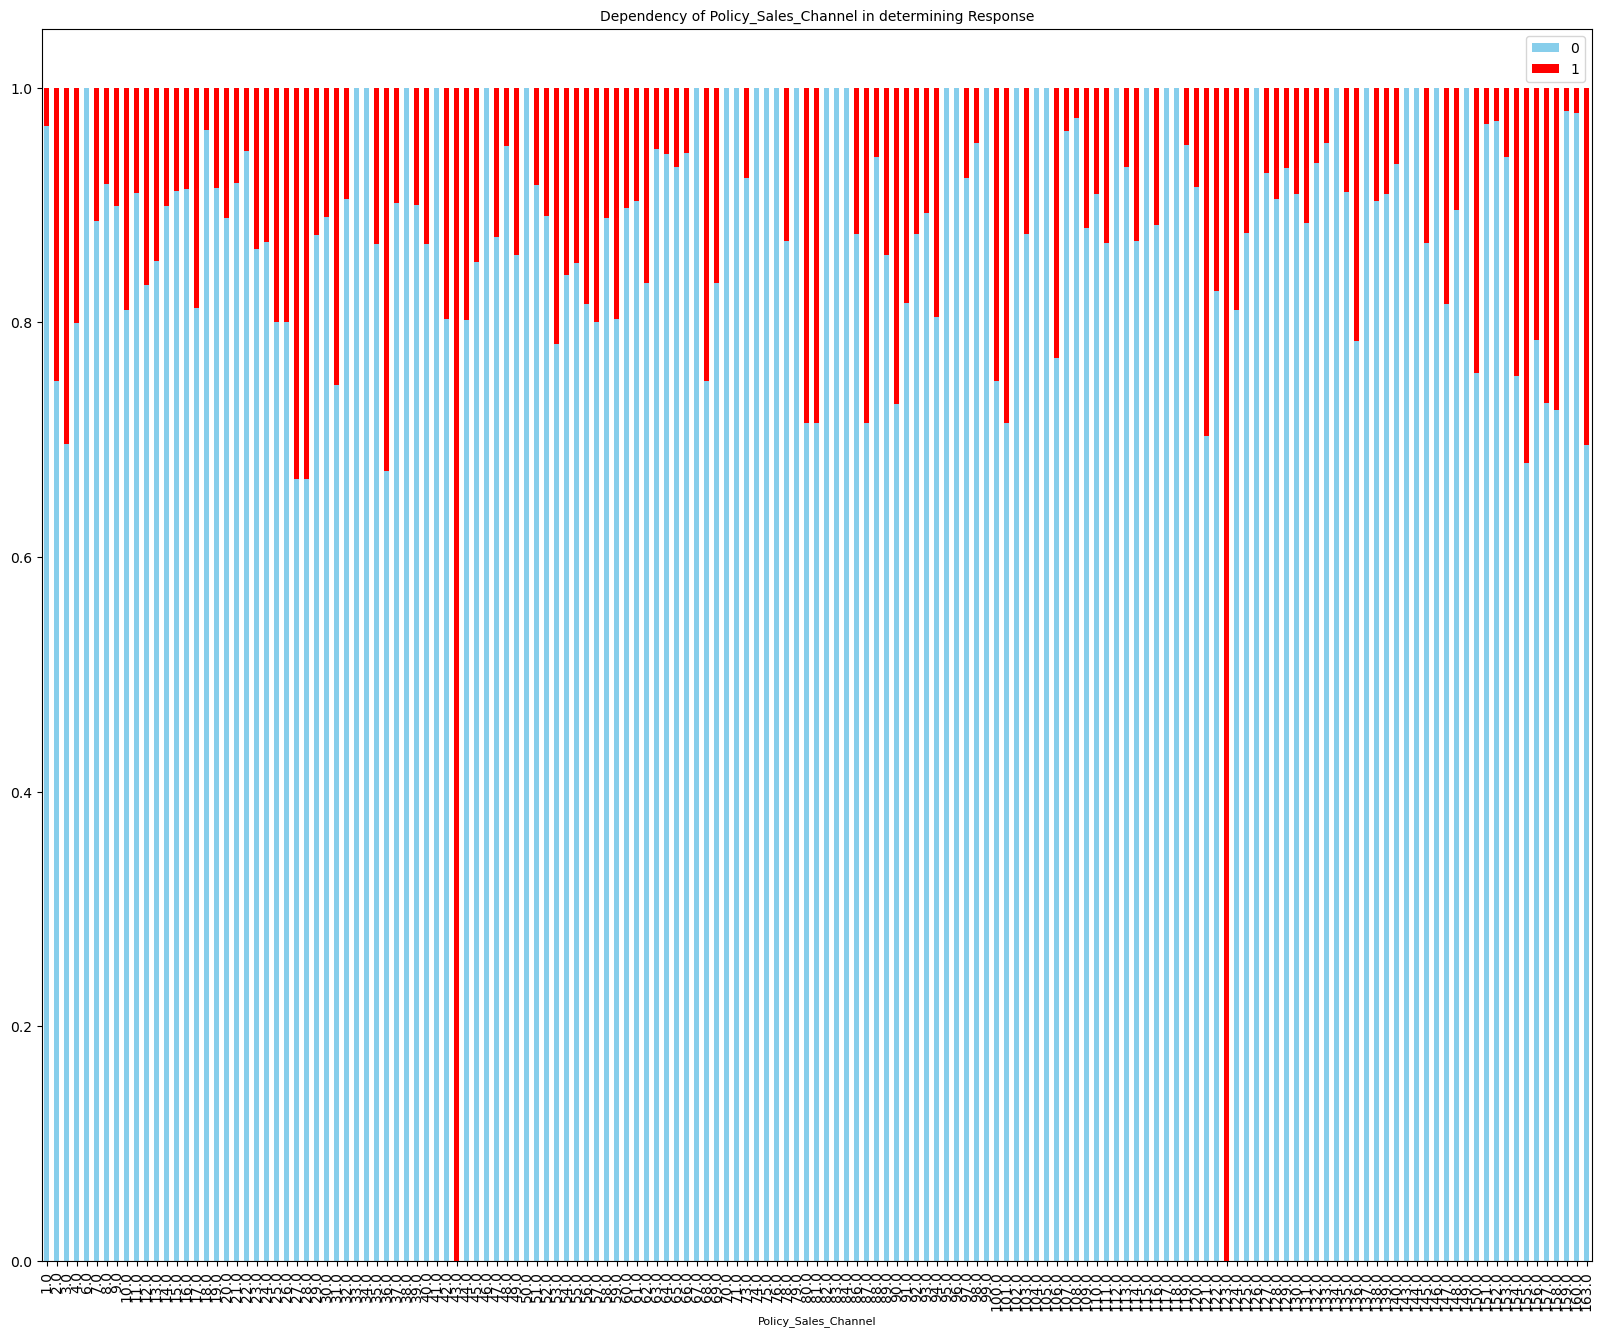

In [140]:
data = pd.crosstab(train['Policy_Sales_Channel'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 16), color = ['skyblue', 'red'])

plt.title('Dependency of Policy_Sales_Channel in determining Response', fontsize = 10)
plt.xlabel('Policy_Sales_Channel', fontsize = 8)
plt.legend()
plt.show()

<Axes: xlabel='Annual_Premium', ylabel='Vehicle_Age'>

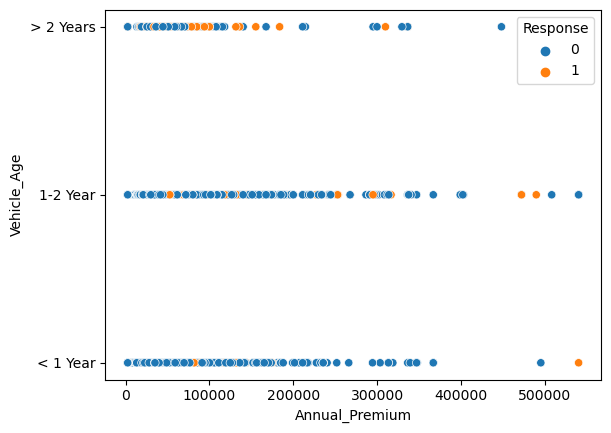

In [141]:
sns.scatterplot(x = 'Annual_Premium', y = 'Vehicle_Age', hue = 'Response', data = train )

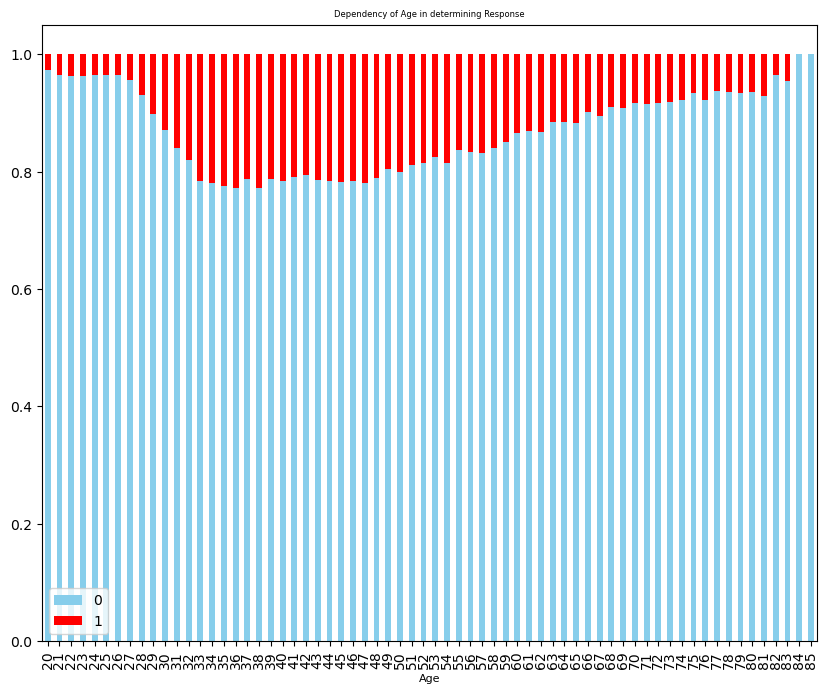

In [142]:
data = pd.crosstab(train['Age'], train['Response'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['skyblue', 'red'])

plt.title('Dependency of Age in determining Response', fontsize = 6)
plt.xlabel('Age', fontsize = 8)
plt.legend()
plt.show()


In [143]:
train.select_dtypes(include=np.number).corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


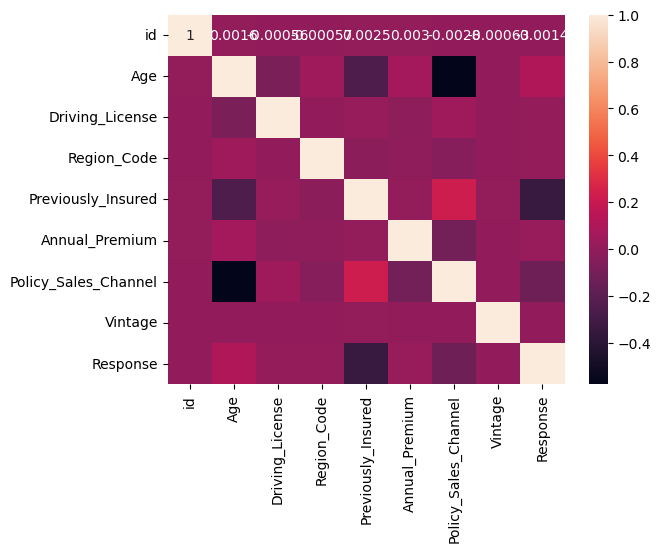

In [144]:
ax=sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)

# EDA Observations

# PreProcessing

In [145]:
# to check the missing values
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [146]:
# to see the column names and its datatype
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [37]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

# Train Data looks good and no missing values exist in it

In [148]:

# idenitify cols
tgt_col = ['Response']
ign_cols = ['id']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [149]:
for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

Gender 2 => ['Male' 'Female']
Age 66 => [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 => [1 0]
Region_Code 53 => [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 => [0 1]
Vehicle_Age 3 => ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 => ['Yes' 'No']
Annual_Premium 48838 => [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 => [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  

In [150]:
# to see numerical columns after removing the target columns and not required columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
train[num_cols].head(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183


In [151]:
train[cat_cols].head(2)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No


In [152]:
# create pipeline to do preprocessing of category columns
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values(though we don't have it in train, used this for testing)
        ('ohe',OneHotEncoder(handle_unknown='ignore')) # category encoding
    ]
)

In [153]:
num_pipe_encode = Pipeline(
    steps = [
        (), # impute missing values
        ()  # standard scaler
    ]
)

In [154]:
# create piplene to perform preprocessing of numerical columns
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num',SimpleImputer(strategy='median')), # impute missing values
        ('scale', StandardScaler())  # standard scaler
    ]
)

In [155]:
# create map b/w the pipeline and the columns 
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode', cat_pipe_encode, cat_cols),  # categorical columns
        ('num_encode', num_pipe_encode, num_cols)   # numerical columns
    ]
)

In [156]:
# create object for the LogisticRegeression algo

#LR witrhout OS,50 with OS 78,78
#RF withy OS, 98,61(overfit) wiyhout HP
#mymodel = RandomForestClassifier(max_depth=10)====80,79
#mymodel = RandomForestClassifier(max_depth=20)====overfitting
#mymodel = LogisticRegression()
mymodel = RandomForestClassifier(max_depth=10,n_estimators=200)
"""
Under sampling
TRAIN ROC AUC SCORE: 0.7991700634609734
VAL ROC AUC SCORE: 0.7980263534617975"""

'\nUnder sampling\nTRAIN ROC AUC SCORE: 0.7991700634609734\nVAL ROC AUC SCORE: 0.7980263534617975'

In [157]:
# merging the preprocessing and modelling in a pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel)  #modelling
    ]
)

In [158]:
# split the train dataset to train and validation
X = train.drop(columns = ign_cols + tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183


In [159]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


In [160]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [161]:
# induded few more libraries



In [162]:
# fit the model
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

In [163]:
# method to perform train and validation prediction witt f1 score evaluation
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):
    pred_train = model_pipeline.predict(train_X)
    pred_val = model_pipeline.predict(val_X)
    
    print('TRAIN ROC AUC SCORE:', roc_auc_score(train_y, pred_train))
    print('VAL ROC AUC SCORE:', roc_auc_score(val_y, pred_val))
    print("Train Report : \n",classification_report(train_y, pred_train))
    print("Test Report : \n",classification_report(val_y, pred_val))
    print("Train Confusion. Matrix : \n",confusion_matrix(train_y, pred_train))
    print("Test Confusion. Matrix  : \n",confusion_matrix(val_y, pred_val)) 

In [164]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

TRAIN ROC AUC SCORE: 0.5001431058744962
VAL ROC AUC SCORE: 0.5
Train Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       1.00      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.94      0.50      0.47    342998
weighted avg       0.89      0.88      0.82    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111

Train Confusion. Matrix : 
 [[301071      0]
 [ 41915     12]]
Test Confusion. Matrix  : 
 [[33328     0]
 [ 4783     0]]


# Oversampling

In [165]:
over_sampling = RandomOverSampler()
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [166]:
model_pipeline.fit(train_X_os, train_y_os)
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

TRAIN ROC AUC SCORE: 0.8006499379639695
VAL ROC AUC SCORE: 0.7986404920752196
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    301071
           1       0.28      0.95      0.43     41927

    accuracy                           0.69    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.69      0.74    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     33328
           1       0.28      0.94      0.43      4783

    accuracy                           0.69     38111
   macro avg       0.63      0.80      0.61     38111
weighted avg       0.90      0.69      0.74     38111

Train Confusion. Matrix : 
 [[197356 103715]
 [  2273  39654]]
Test Confusion. Matrix  : 
 [[21906 11422]
 [  287  4496]]


# Under Sampling

In [167]:
under_sampling = RandomUnderSampler()
train_X_us, train_y_us =  under_sampling.fit_resample(train_X, train_y)
model_pipeline.fit(train_X_us, train_y_us)
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

TRAIN ROC AUC SCORE: 0.7996377351487576
VAL ROC AUC SCORE: 0.7986502155628195
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.65      0.79    301071
           1       0.28      0.95      0.43     41927

    accuracy                           0.69    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.69      0.74    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     33328
           1       0.28      0.94      0.43      4783

    accuracy                           0.69     38111
   macro avg       0.63      0.80      0.61     38111
weighted avg       0.90      0.69      0.74     38111

Train Confusion. Matrix : 
 [[196488 104583]
 [  2237  39690]]
Test Confusion. Matrix  : 
 [[21830 11498]
 [  276  4507]]


# Both Under and Oversampling provided Same result for Random Forest

In [168]:
train_X_us.shape,train_y_us.shape,train_X_os.shape,train_y_os.shape,train_X.shape,train_y.shape

((83854, 10), (83854, 1), (602142, 10), (602142, 1), (342998, 10), (342998, 1))

In [169]:
train_y.Response.value_counts()

Response
0    301071
1     41927
Name: count, dtype: int64

In [170]:
train_y_os.Response.value_counts()

Response
0    301071
1    301071
Name: count, dtype: int64

In [171]:
train_y_us.Response.value_counts()

Response
0    41927
1    41927
Name: count, dtype: int64

In [172]:
#model_XG_CV = xgb.XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=10,min_child_weight=1,subsample=0.8,learning_rate=0.03,eval_metric='auc') ---81,80
model_XG_CV = xgb.XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=10,min_child_weight=1,subsample=0.8,learning_rate=0.03,eval_metric='auc')


In [173]:
model_pipeline_xg_cv = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', model_XG_CV)  #modelling
    ]
)

In [174]:
model_pipeline_xg_cv.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [175]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline_xg_cv)

TRAIN ROC AUC SCORE: 0.8154723910197167
VAL ROC AUC SCORE: 0.7986918414995741
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.68      0.81    301071
           1       0.29      0.95      0.45     41927

    accuracy                           0.71    342998
   macro avg       0.64      0.82      0.63    342998
weighted avg       0.90      0.71      0.76    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.92      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111

Train Confusion. Matrix : 
 [[205240  95831]
 [  2128  39799]]
Test Confusion. Matrix  : 
 [[22655 10673]
 [  394  4389]]


In [177]:
sub.head(2)

,id,Response
0,381110,0
1,381111,0


In [178]:
sub['Response'] = model_pipeline_xg_cv.predict(test)
sub.to_csv('submmission3.csv',index=False)

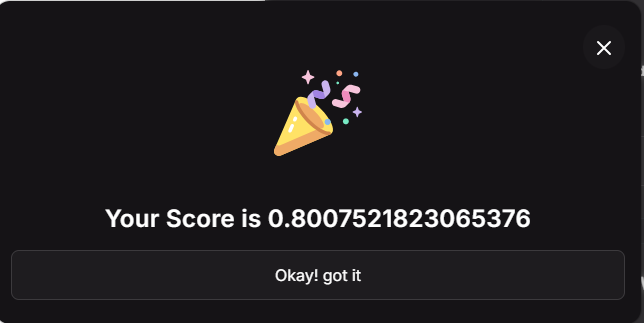

In [179]:
# create the pickle file
joblib.dump(model_pipeline, 'pipeline_model.pkl')

['pipeline_model.pkl']

In [180]:
train_X.dtypes


Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [81]:
train_y.dtypes

Response    int64
dtype: object

In [82]:
train_X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
273483,Male,59,1,28.0,0,1-2 Year,Yes,21261.0,26.0,144
371246,Female,42,1,1.0,0,1-2 Year,Yes,2630.0,124.0,211
90689,Male,23,1,18.0,1,< 1 Year,No,29869.0,152.0,80
94809,Female,25,1,47.0,0,< 1 Year,Yes,42822.0,152.0,199
50505,Male,55,1,26.0,1,1-2 Year,No,33225.0,22.0,230


In [83]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, n_estimators=100)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=10,min_child_weight=1,subsample=0.8,learning_rate=0.03,eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')

In [84]:
model_pipeline_voting = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', voting_model)  #modelling
    ]
)

In [85]:
model_pipeline_voting.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.03,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=10,
                                                             max_leaves=None,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft'))])

In [86]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline_voting)

TRAIN ROC AUC SCORE: 0.8056217454996274
VAL ROC AUC SCORE: 0.7984089664256379
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    301071
           1       0.28      0.95      0.44     41927

    accuracy                           0.70    342998
   macro avg       0.64      0.81      0.62    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[200400 100671]
 [  2280  39647]]
Test Confusion. Matrix  : 
 [[22232 11096]
 [  336  4447]]


In [115]:
mymodel_try = RandomForestClassifier(max_depth=7,n_estimators=500)

In [116]:
# merging the preprocessing and modelling in a pipeline
model_pipeline_try = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel_try)  #modelling
    ]
)

In [118]:
train_X_os

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,Male,59,1,28.0,0,1-2 Year,Yes,21261.0,26.0
1,Female,42,1,1.0,0,1-2 Year,Yes,2630.0,124.0
2,Male,23,1,18.0,1,< 1 Year,No,29869.0,152.0
3,Female,25,1,47.0,0,< 1 Year,Yes,42822.0,152.0
4,Male,55,1,26.0,1,1-2 Year,No,33225.0,22.0
...,...,...,...,...,...,...,...,...,...
602137,Male,51,1,5.0,0,1-2 Year,Yes,29309.0,26.0
602138,Male,38,1,28.0,0,1-2 Year,Yes,49998.0,26.0
602139,Male,29,1,35.0,0,< 1 Year,Yes,34629.0,152.0
602140,Male,55,1,35.0,0,1-2 Year,Yes,2630.0,26.0


In [119]:
model_pipeline_try.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=7, n_estimators=500))])

In [120]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline_try)

TRAIN ROC AUC SCORE: 0.7949203985018489
VAL ROC AUC SCORE: 0.7967642322248876
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.65      0.78    301071
           1       0.27      0.94      0.42     41927

    accuracy                           0.69    342998
   macro avg       0.63      0.79      0.60    342998
weighted avg       0.90      0.69      0.74    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.65      0.79     33328
           1       0.28      0.94      0.43      4783

    accuracy                           0.69     38111
   macro avg       0.63      0.80      0.61     38111
weighted avg       0.90      0.69      0.74     38111

Train Confusion. Matrix : 
 [[195931 105140]
 [  2555  39372]]
Test Confusion. Matrix  : 
 [[21767 11561]
 [  285  4498]]


# Below are the different models I tried along with GRIDCV Search

In [47]:
mymodel1 = RandomForestClassifier()

"""
Under sample
TRAIN ROC AUC SCORE: 0.8657455120771116
VAL ROC AUC SCORE: 0.7816201512166681"""

'\nUnder sample\nTRAIN ROC AUC SCORE: 0.8657455120771116\nVAL ROC AUC SCORE: 0.7816201512166681'

In [48]:
# merging the preprocessing and modelling in a pipeline
model_pipeline1 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel1)  #modelling
    ]
)

In [49]:
clf=model_pipeline1.fit(train_X_os, train_y_os)

In [50]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline1)

TRAIN ROC AUC SCORE: 0.9999236060597002
VAL ROC AUC SCORE: 0.6018193623921495
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    301071
           1       1.00      1.00      1.00     41927

    accuracy                           1.00    342998
   macro avg       1.00      1.00      1.00    342998
weighted avg       1.00      1.00      1.00    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     33328
           1       0.36      0.28      0.31      4783

    accuracy                           0.85     38111
   macro avg       0.63      0.60      0.61     38111
weighted avg       0.83      0.85      0.84     38111

Train Confusion. Matrix : 
 [[301025     46]
 [     0  41927]]
Test Confusion. Matrix  : 
 [[30938  2390]
 [ 3466  1317]]


In [52]:
mymodel2 = AdaBoostClassifier(n_estimators=200)

'''
mymodel2 = AdaBoostClassifier(n_estimators=200)
TRAIN ROC AUC SCORE: 0.7985459742889975
VAL ROC AUC SCORE: 0.7974124438208252

Under Sample

TRAIN ROC AUC SCORE: 0.7983035741404785
VAL ROC AUC SCORE: 0.7984336923136219
'''

'\nmymodel2 = AdaBoostClassifier(n_estimators=200)\nTRAIN ROC AUC SCORE: 0.7985459742889975\nVAL ROC AUC SCORE: 0.7974124438208252\n\nUnder Sample\n\nTRAIN ROC AUC SCORE: 0.7983035741404785\nVAL ROC AUC SCORE: 0.7984336923136219\n'

In [53]:
# merging the preprocessing and modelling in a pipeline
model_pipeline2 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel2)  #modelling
    ]
)

In [151]:
model_pipeline2.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', AdaBoostClassifier(n_estimators=200))])

In [152]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline2)

TRAIN ROC AUC SCORE: 0.7985459742889975
VAL ROC AUC SCORE: 0.7974124438208252
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    301071
           1       0.28      0.93      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[200929 100142]
 [  2947  38980]]
Test Confusion. Matrix  : 
 [[22291 11037]
 [  354  4429]]


In [54]:
mymodel3 = GradientBoostingClassifier(n_estimators = 100)
'''
mymodel3 = GradientBoostingClassifier(n_estimators = 100)
TRAIN ROC AUC SCORE: 0.7985635522366253
VAL ROC AUC SCORE: 0.7981877696291746

Under sample
TRAIN ROC AUC SCORE: 0.7986870812731848
VAL ROC AUC SCORE: 0.798634482332561
'''

'\nmymodel3 = GradientBoostingClassifier(n_estimators = 100)\nTRAIN ROC AUC SCORE: 0.7985635522366253\nVAL ROC AUC SCORE: 0.7981877696291746\n\nUnder sample\nTRAIN ROC AUC SCORE: 0.7986870812731848\nVAL ROC AUC SCORE: 0.798634482332561\n'

In [55]:
# merging the preprocessing and modelling in a pipeline
model_pipeline3 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel3)  #modelling
    ]
)

In [156]:
model_pipeline3.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [157]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline3)

TRAIN ROC AUC SCORE: 0.7985635522366253
VAL ROC AUC SCORE: 0.7981877696291746
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    301071
           1       0.28      0.93      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[200559 100512]
 [  2894  39033]]
Test Confusion. Matrix  : 
 [[22273 11055]
 [  344  4439]]


In [159]:
#pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 578.7 kB/s eta 0:03:35
   ---------------------------------------- 0.5/124.9 MB 578.7 kB/s eta 0:03:35
   ---------------------------------------- 0.8/124.9 MB 550.1 kB/s eta 0:03:46
   ---------------------------------------- 0.8/124.9 MB 550.1 kB/s eta 0:03:46
   ---------------------------------------- 0.8/124.9 MB 550.1 kB/s eta 0:03:46
   ---------------------------------------- 1.0/124.9 MB 513.7 kB/s eta 0:04:02
   ---------------------------------------- 1.0/124.9 MB 513.7 kB/s eta 0:04:02
   ---------------------------------------- 1.0/124.9 MB 513.7 kB/s eta 0:04:02
   ---------------------------------------- 1.3/124.9 MB 490.0 kB/s eta 0:04

In [81]:
mymodel4 = xgb.XGBClassifier(eval_metric='auc')

'''
mymodel4 = xgb.XGBClassifier(eval_metric='auc')

oversample

TRAIN ROC AUC SCORE: 0.8176054388180336
VAL ROC AUC SCORE: 0.7978693379567117

Under sample
TRAIN ROC AUC SCORE: 0.8116535831354094
VAL ROC AUC SCORE: 0.7970052084770944
'''

"\nmymodel4 = xgb.XGBClassifier(eval_metric='auc')\n\noversample\n\nTRAIN ROC AUC SCORE: 0.8176054388180336\nVAL ROC AUC SCORE: 0.7978693379567117\n\nUnder sample\nTRAIN ROC AUC SCORE: 0.8116535831354094\nVAL ROC AUC SCORE: 0.7970052084770944\n"

In [82]:
# merging the preprocessing and modelling in a pipeline
model_pipeline4 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel4)  #modelling
    ]
)

In [88]:
model_pipeline4.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [89]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline4)

TRAIN ROC AUC SCORE: 0.8184688633767209
VAL ROC AUC SCORE: 0.7963636935411652
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.70      0.82    301071
           1       0.30      0.94      0.46     41927

    accuracy                           0.73    342998
   macro avg       0.64      0.82      0.64    342998
weighted avg       0.90      0.73      0.77    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.69      0.81     33328
           1       0.30      0.90      0.45      4783

    accuracy                           0.72     38111
   macro avg       0.64      0.80      0.63     38111
weighted avg       0.89      0.72      0.77     38111

Train Confusion. Matrix : 
 [[209256  91815]
 [  2436  39491]]
Test Confusion. Matrix  : 
 [[23113 10215]
 [  482  4301]]


In [198]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')
"""
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')


Oversample
TRAIN ROC AUC SCORE: 0.8058477669792501
VAL ROC AUC SCORE: 0.7997591824602033


Under Sample

TRAIN ROC AUC SCORE: 0.8040505821071795
VAL ROC AUC SCORE: 0.7979545753036563
"""

"\nclf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',\n                       max_depth=8, n_estimators=50)\nclf2 = GradientBoostingClassifier() \nclf3 = xgb.XGBClassifier(eval_metric='auc')\n\nvoting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')\n\n\nTRAIN ROC AUC SCORE: 0.8058477669792501\nVAL ROC AUC SCORE: 0.7997591824602033\n\n"

In [199]:
model_pipeline5 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', voting_model)  #modelling
    ]
)

In [169]:
model_pipeline5.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft'))])

In [170]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline5)

TRAIN ROC AUC SCORE: 0.8058477669792501
VAL ROC AUC SCORE: 0.7997591824602033
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    301071
           1       0.28      0.94      0.44     41927

    accuracy                           0.70    342998
   macro avg       0.64      0.81      0.62    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[201247  99824]
 [  2379  39548]]
Test Confusion. Matrix  : 
 [[22322 11006]
 [  336  4447]]


In [200]:
model_pipeline.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

In [201]:
model_pipeline1.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [202]:
model_pipeline2.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', AdaBoostClassifier(n_estimators=200))])

In [203]:
model_pipeline3.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [204]:
model_pipeline4.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [205]:
model_pipeline5.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft'))])

In [206]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

TRAIN ROC AUC SCORE: 0.7991700634609734
VAL ROC AUC SCORE: 0.7980263534617975
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.65      0.79    301071
           1       0.28      0.94      0.43     41927

    accuracy                           0.69    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.69      0.74    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     33328
           1       0.28      0.94      0.43      4783

    accuracy                           0.69     38111
   macro avg       0.63      0.80      0.61     38111
weighted avg       0.90      0.69      0.74     38111

Train Confusion. Matrix : 
 [[197104 103967]
 [  2362  39565]]
Test Confusion. Matrix  : 
 [[21879 11449]
 [  289  4494]]


In [207]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline1)

TRAIN ROC AUC SCORE: 0.8657455120771116
VAL ROC AUC SCORE: 0.7816201512166681
Train Report : 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85    301071
           1       0.34      1.00      0.51     41927

    accuracy                           0.76    342998
   macro avg       0.67      0.87      0.68    342998
weighted avg       0.92      0.76      0.80    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.97      0.69      0.81     33328
           1       0.29      0.87      0.43      4783

    accuracy                           0.71     38111
   macro avg       0.63      0.78      0.62     38111
weighted avg       0.89      0.71      0.76     38111

Train Confusion. Matrix : 
 [[220281  80790]
 [     7  41920]]
Test Confusion. Matrix  : 
 [[23057 10271]
 [  615  4168]]


In [208]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline2)

TRAIN ROC AUC SCORE: 0.7983035741404785
VAL ROC AUC SCORE: 0.7984336923136219
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    301071
           1       0.28      0.93      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[199749 101322]
 [  2803  39124]]
Test Confusion. Matrix  : 
 [[22157 11171]
 [  325  4458]]


In [209]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline3)

TRAIN ROC AUC SCORE: 0.7986870812731848
VAL ROC AUC SCORE: 0.798634482332561
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    301071
           1       0.28      0.93      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     33328
           1       0.29      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[200102 100969]
 [  2820  39107]]
Test Confusion. Matrix  : 
 [[22254 11074]
 [  337  4446]]


In [210]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline4)

TRAIN ROC AUC SCORE: 0.8116535831354094
VAL ROC AUC SCORE: 0.7970052084770944
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.68      0.81    301071
           1       0.29      0.94      0.45     41927

    accuracy                           0.71    342998
   macro avg       0.64      0.81      0.63    342998
weighted avg       0.90      0.71      0.76    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111

Train Confusion. Matrix : 
 [[204865  96206]
 [  2396  39531]]
Test Confusion. Matrix  : 
 [[22668 10660]
 [  412  4371]]


In [211]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline5)

TRAIN ROC AUC SCORE: 0.8040505821071795
VAL ROC AUC SCORE: 0.7979545753036563
Train Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79    301071
           1       0.28      0.94      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.80      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     33328
           1       0.28      0.93      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.61     38111
weighted avg       0.90      0.70      0.75     38111

Train Confusion. Matrix : 
 [[199655 101416]
 [  2308  39619]]
Test Confusion. Matrix  : 
 [[22139 11189]
 [  327  4456]]


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [66]:
# Hyper paramneter Tuning - GridSearch

param_grid = {

    'model': [RandomForestClassifier()],
    
    'model__n_estimators' : [50,100,150, 200,250],
    'model__max_depth' : [8,10,15,18,20]
}


In [67]:
grid = GridSearchCV(estimator = model_pipeline1, param_grid=param_grid, cv= 2, verbose=2, scoring='roc_auc')

In [68]:
grid.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocess',
   ColumnTransformer(transformers=[('cat_encode',
                                    Pipeline(steps=[('impute_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                   ('num_encode',
                                    Pipeline(steps=[('impute_num',
                                                     SimpleImputer(strategy='median')),
                                                    ('scale', StandardScaler())]),
                                    Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
          'Annual_Premium', 'Policy_S

In [69]:
grid.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=50; total time=  18.6s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=50; total time=  17.2s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=100; total time=  33.4s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=100; total time=  35.0s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=150; total time=  50.7s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=150; total time=  51.5s
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=200; total time= 1.1min
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=200; total time= 1.1min
[CV] END model=RandomForestClassifier(), model__max_depth=8, model__n_estimators=250; total time= 1.4

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(str...
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model': [RandomForestClassifier()],
                         'model__max_depth': [8, 10, 15, 18, 20],
                         'model__n_estimators': [50, 100, 150, 200, 250]},
             scoring='roc_auc', verbose=2)

In [75]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=250))])

In [76]:
grid.best_params_

{'model': RandomForestClassifier(),
 'model__max_depth': 20,
 'model__n_estimators': 250}

In [ ]:
{'model': RandomForestClassifier(),
 'model__max_depth': 20,
 'model__n_estimators': 250}


"""
TRAIN ROC AUC SCORE: 0.8769868397006443
VAL ROC AUC SCORE: 0.7803029009416752
"""

In [77]:
mymodel_cv1 = RandomForestClassifier(max_depth=20,n_estimators=250)

In [78]:
model_pipeline_cv1 = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel_cv1)  #modelling
    ]
)

In [79]:
model_pipeline_cv1.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=250))])

In [80]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline_cv1)

TRAIN ROC AUC SCORE: 0.8769868397006443
VAL ROC AUC SCORE: 0.7803029009416752
Train Report : 
               precision    recall  f1-score   support

           0       1.00      0.76      0.86    301071
           1       0.37      0.99      0.53     41927

    accuracy                           0.79    342998
   macro avg       0.68      0.88      0.70    342998
weighted avg       0.92      0.79      0.82    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     33328
           1       0.31      0.82      0.45      4783

    accuracy                           0.75     38111
   macro avg       0.64      0.78      0.64     38111
weighted avg       0.88      0.75      0.79     38111

Train Confusion. Matrix : 
 [[228802  72269]
 [   251  41676]]
Test Confusion. Matrix  : 
 [[24537  8791]
 [  840  3943]]


In [113]:
model = xgb.XGBClassifier(eval_metric='auc')

In [114]:
model_pipeline_xg = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', model)  #modelling
    ]
)

In [115]:
param_grid1 = {
        'model': [xgb.XGBClassifier(eval_metric='auc')],
        'model__min_child_weight': [1, 5, 10],
        'model__gamma': [ 0.5,1],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8],
        'model__max_depth': [4, 6,10]
        }

In [116]:
grid1 = GridSearchCV(estimator = model_pipeline_xg, param_grid=param_grid1, cv= 2, verbose=2)

In [117]:
grid1.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), model__colsample_bytree=0.6, model__gamma=0.5, model__max_depth=4, model__min_child_weight=1, model__subsample=0.6; total time=   6.4s
[CV] END model=XGBClassifie

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(str...
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...)],
                         'model__colsample_bytree': [0.6, 0.8],
                         'model__gamma': [0.5, 1],
                         'model__max_depth': [4, 6, 10],
                         'model__min_child_weight': [1, 5, 10],
                         'model__subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [118]:
grid1.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='auc', feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'model__colsample_bytree': 0.8,
 'model__gamma': 0.5,
 'model__max_depth': 10,
 'model__min_child_weight': 1,
 'model__subsample': 0.8}

In [190]:
#model_XG_CV = xgb.XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=10,min_child_weight=1,subsample=0.8,learning_rate=0.03,eval_metric='auc') ---81,80
model_XG_CV = xgb.XGBClassifier(colsample_bytree=0.8,gamma=0.5,max_depth=10,min_child_weight=1,subsample=0.8,learning_rate=0.03,eval_metric='auc')


In [191]:
model_pipeline_xg_cv = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', model_XG_CV)  #modelling
    ]
)

In [192]:
model_pipeline_xg_cv.fit(train_X_os, train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   St...
                               feature_types=None, gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [193]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline_xg_cv)

TRAIN ROC AUC SCORE: 0.8745397039437496
VAL ROC AUC SCORE: 0.774934544618086
Train Report : 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87    301071
           1       0.37      0.98      0.54     41927

    accuracy                           0.80    342998
   macro avg       0.68      0.87      0.70    342998
weighted avg       0.92      0.80      0.83    342998

Test Report : 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84     33328
           1       0.31      0.80      0.45      4783

    accuracy                           0.75     38111
   macro avg       0.64      0.77      0.65     38111
weighted avg       0.88      0.75      0.79     38111

Train Confusion. Matrix : 
 [[232154  68917]
 [   923  41004]]
Test Confusion. Matrix  : 
 [[24869  8459]
 [  939  3844]]


In [101]:
grid1.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocess',
   ColumnTransformer(transformers=[('cat_encode',
                                    Pipeline(steps=[('impute_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                   ('num_encode',
                                    Pipeline(steps=[('impute_num',
                                                     SimpleImputer(strategy='median')),
                                                    ('scale', StandardScaler())]),
                                    Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
          'Annual_Premium', 'Policy_S

In [188]:
grid1.best_params_, grid1.best_score_

({'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='auc', feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'model__colsample_bytree': 0.8,
  'model__gamma': 0.5,
  'model__max_depth': 10,
  'model__min_child_weight': 1,
  'model__subsample': 0.8},
 np.float64(0.8491103427430738))